<a href="https://colab.research.google.com/github/andymacale/progetto_lab/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Importazione delle librerie
import rawpy # per caricare le immagini in formato RAW
import imageio # per gestire l'IO delle immagini
!python3 train.py

torch.Size([4, 4, 256, 256])
Traceback (most recent call last):
  File "/content/progetto_lab/train.py", line 77, in <module>
    outputs = model(inputs)         # Forward pass
              ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1739, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1750, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/progetto_lab/unet.py", line 55, in forward
    bn = self.bottleneck(p2)     # [B,256,H/4,W/4]
         ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1739, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py"

In [40]:
from google.colab import files
path = files.upload()

Saving DSC_0007.NEF to DSC_0007 (4).NEF


In [41]:
if path:
    try:
       nome = list(path.keys())[0]
       with rawpy.imread(nome) as raw:
          immagine = raw.postprocess()
    except:
        print('Formato immagine non valido!')

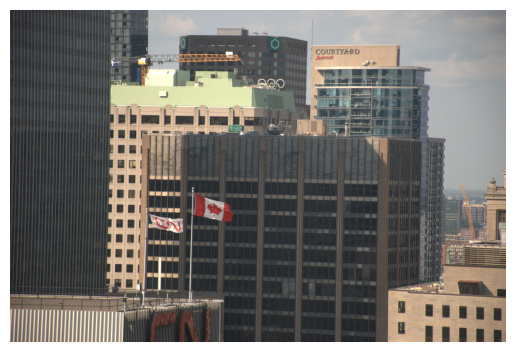

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def stampaImmagine(dati):
  # Per stampare le immagini singole
  plotImmagine = plt.imshow(dati)
  plt.axis('off')
  plt.show()

stampaImmagine(immagine)

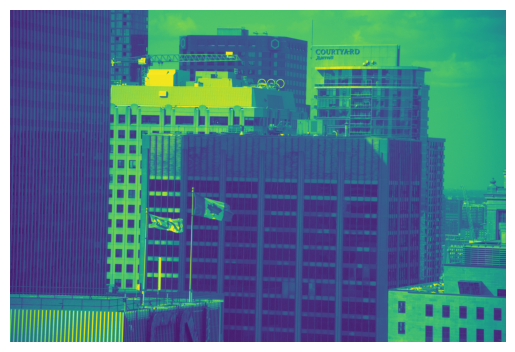

In [43]:
# Conversione dati immagine da RGB a YCbCr
from PIL import Image
import numpy as np

datiRGB = Image.fromarray(immagine)
datiYCbCr = datiRGB.convert('YCbCr')

y, cb, cr = datiYCbCr.split()
stampaImmagine(y)

In [44]:
# Equalizzatore dell'istogramma sulla componente y
import cv2
ascissa, ordinata = np.shape(y)
yArray = np.array(y)
yEqArray = cv2.equalizeHist(yArray) # Istogramma
yEq = Image.fromarray(yEqArray)
datiImmagineEqualizzataYCbCr = Image.merge('YCbCr', (yEq, cb, cr)) # Inserimento della y equalizzata
immagineEqualizzata = datiImmagineEqualizzataYCbCr.convert('RGB')

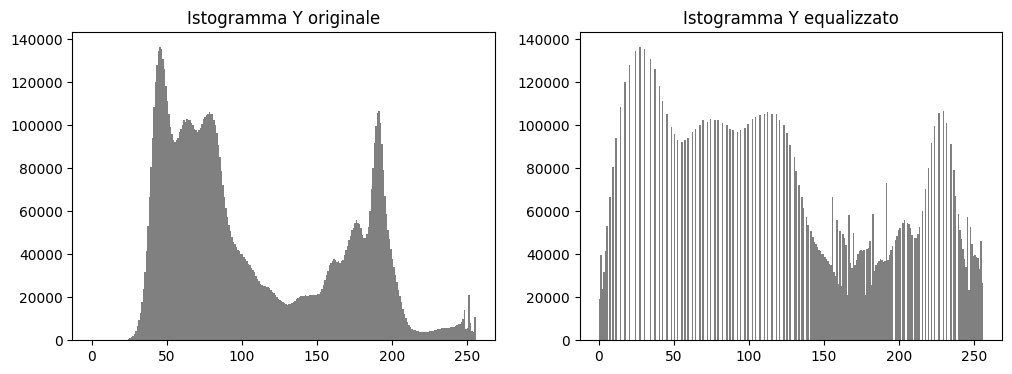

In [ ]:
# Confronto tra i due istogrammi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(yArray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Istogramma Y originale')

plt.subplot(1, 2, 2)
plt.hist(yEqArray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Istogramma Y equalizzato')

plt.show()

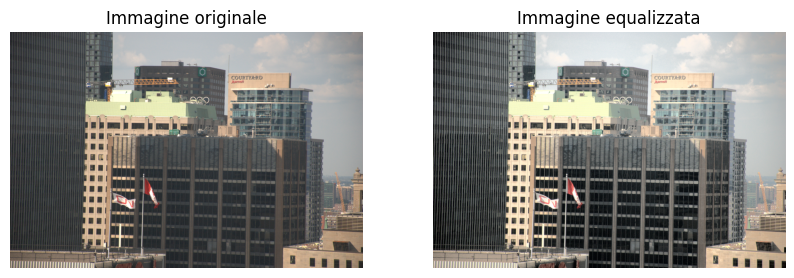

In [ ]:
# Confronto tra l'immagine originale e quella equalizzata
figure, assi = plt.subplots(1, 2, figsize=(10, 5))

assi[0].imshow(immagine)
assi[0].set_title('Immagine originale')
assi[0].axis('off')

assi[1].imshow(immagineEqualizzata)
assi[1].set_title('Immagine equalizzata')
assi[1].axis('off')

plt.show()

In [ ]:
# Calcolo delle metriche
from skimage.metrics import structural_similarity as ssim
import math

def calcoloMSE(originale, modificata):
  return np.mean((originale - modificata) ** 2)

def calcoloPSNR(originale, modificata):
  mse = calcoloMSE(originale, modificata)
  if mse == 0:
    # Immagini identiche
    return float('-inf')
  # Immagini diverse
  massimo = 255.0
  return 10 * math.log10 ((massimo ** 2)/mse)

def calcoloSSIM(originale, modificata):
  # Converti i dati delle immagini in array
  originaleArray = np.array(originale)
  modificataArray = np.array(modificata)
  # Per gestire le immagini di dimensioni differenti
  multichannel = True if originaleArray.ndim == 3 else False
  return ssim(originaleArray, modificataArray, multichannel=multichannel, win_size=3)


In [ ]:
print('Metriche:\n')
print(f'\tMSE: {calcoloMSE(immagine, immagineEqualizzata):.2f}\n')
print(f'\tPSNR: {calcoloPSNR(immagine, immagineEqualizzata):.2f} dB\n')
print(f'\tSSIM: {calcoloSSIM(immagine, immagineEqualizzata):.4f}\n')


Metriche:

	MSE: 105.36

	PSNR: 27.90 dB

	SSIM: 0.8977

